# Residential Real Estate Market Prices: A Data Analysis Project for a Real Estate Investment Trust Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
filename = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filename)

### Question 1: display the data types for each column using the function dtypes.

In [13]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Question 2

In [15]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Question 3

In [17]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

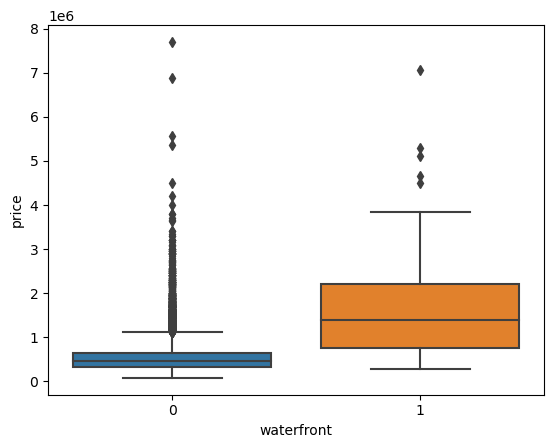

In [18]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.show()


### Question 5

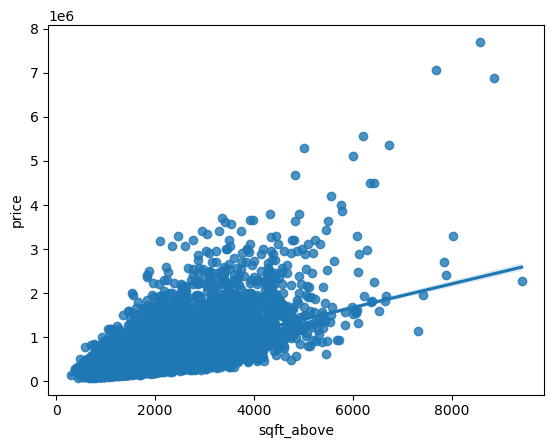

In [19]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.show()

### Question 6

In [20]:
from sklearn.metrics import r2_score

In [22]:
lm = LinearRegression()
sqft = df[['sqft_living']]
price = df[['price']]
lm.fit(sqft, price)

LinearRegression()

In [23]:
price_hat = lm.predict(sqft)
print('The R^2 is:', r2_score(price, price_hat))

The R^2 is: 0.4928532179037931


### Question 7

In [24]:
from sklearn.impute import SimpleImputer

In [29]:
features = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]


#### features have NaN values, hence they need to be preprocessed

In [30]:
Imp = SimpleImputer(strategy="mean")

In [32]:
features_imputer = Imp.fit_transform(features)
lm.fit(features_imputer, price)

LinearRegression()

In [33]:
price2_hat = lm.predict(features_imputer)
print('The R^2 value is:', r2_score(price, price2_hat))

The R^2 value is: 0.6576951666037502


### Question 8

In [35]:

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(features_imputer, price)
predicted_price = pipe.predict(features_imputer)
print('the R^2 is:', r2_score(price, predicted_price))

the R^2 is: 0.7513406010063584


### Question 9

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [40]:
x_train, x_test, y_train,y_test = train_test_split(features_imputer, price, test_size=0.10, random_state=0 )
rid = Ridge(alpha=0.1)
rid.fit(x_train, y_train)

predicted_price2 = rid.predict(x_test)

print('The R^2 is:', r2_score(y_test, predicted_price2))

The R^2 is: 0.6515088693551062


### Question 10

In [42]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

rid.fit(x_train_pr, y_train)
pred_price_pol = rid.predict(x_test_pr)
print('the R^2 is:', r2_score(y_test, pred_price_pol))

the R^2 is: 0.7218587588293426
